In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
data_df = pd.read_csv('../data/happiness_report.csv')

In [5]:
data_df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,2015
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,2015
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,2015
3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,2015
4,Argentina,Latin America and Caribbean,30.0,6.574,1.05351,2015


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 6 columns):
Country                     495 non-null object
Region                      495 non-null object
Happiness Rank              470 non-null float64
Happiness Score             470 non-null float64
Economy (GDP per Capita)    470 non-null float64
Year                        495 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 23.3+ KB


In [7]:
data_df.isnull().sum(axis=0)

Country                      0
Region                       0
Happiness Rank              25
Happiness Score             25
Economy (GDP per Capita)    25
Year                         0
dtype: int64

In [8]:
data_df.dropna(inplace=True)

In [10]:
data_df['Region'].value_counts()

Sub-Saharan Africa                 117
Central and Eastern Europe          87
Latin America and Caribbean         68
Western Europe                      63
Middle East and Northern Africa     58
Southeastern Asia                   26
Southern Asia                       21
Eastern Asia                        18
Australia and New Zealand            6
North America                        6
Name: Region, dtype: int64

In [18]:
gb_df = data_df.groupby( ['Year','Region'] )['Happiness Score'].mean()

In [20]:
gb_df

Year  Region                         
2015  Australia and New Zealand          7.285000
      Central and Eastern Europe         5.332931
      Eastern Asia                       5.626167
      Latin America and Caribbean        6.144682
      Middle East and Northern Africa    5.406900
      North America                      7.273000
      Southeastern Asia                  5.317444
      Southern Asia                      4.580857
      Sub-Saharan Africa                 4.202800
      Western Europe                     6.689619
2016  Australia and New Zealand          7.323500
      Central and Eastern Europe         5.370690
      Eastern Asia                       5.624167
      Latin America and Caribbean        6.101750
      Middle East and Northern Africa    5.386053
      North America                      7.254000
      Southeastern Asia                  5.338889
      Southern Asia                      4.563286
      Sub-Saharan Africa                 4.136421
      Wester

- ```pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')```

In [21]:
pd.pivot_table(data_df, index='Year', columns='Region', values='Happiness Score', aggfunc='mean')

Region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2015,7.2850,5.332931,5.626167,6.144682,5.406900,7.2730,5.317444,4.580857,4.202800,6.689619
2016,7.3235,5.370690,5.624167,6.101750,5.386053,7.2540,5.338889,4.563286,4.136421,6.685667
2017,7.2990,5.409931,5.646667,5.957818,5.369684,7.1545,5.444875,4.628429,4.111949,6.703714


In [23]:
year_region_pivot = pd.pivot_table(data_df, index='Region', columns='Year',
                                               values=['Happiness Score', 'Economy (GDP per Capita)'],
                                               aggfunc='mean')
year_region_pivot

Economy (GDP per Capita)                      \
Year                                                2015      2016      2017   
Region                                                                         
Australia and New Zealand                       1.291880  1.402545  1.445060   
Central and Eastern Europe                      0.942438  1.047537  1.092051   
Eastern Asia                                    1.151780  1.277312  1.318716   
Latin America and Caribbean                     0.876815  0.993410  1.006981   
Middle East and Northern Africa                 1.066973  1.139323  1.168535   
North America                                   1.360400  1.474055  1.512732   
Southeastern Asia                               0.789054  0.896381  0.965253   
Southern Asia                                   0.560486  0.660671  0.697479   
Sub-Saharan Africa                              0.380473  0.474321  0.501749   
Western Europe                                  1.298596  1.417056  1.457411   

                                Happiness Score                      
Year                                       2015      2016      2017  
Region                                                               
Australia and New Zealand              7.285000  7.323500  7.299000  
Central and Eastern Europe             5.332931  5.370690  5.409931  
Eastern Asia                           5.626167  5.624167  5.646667  
Latin America and Caribbean            6.144682  6.101750  5.957818  
Middle East and Northern Africa        5.406900  5.386053  5.369684  
North America                          7.273000  7.254000  7.154500  
Southeastern Asia                      5.317444  5.338889  5.444875  
Southern Asia                          4.580857  4.563286  4.628429  
Sub-Saharan Africa                     4.202800  4.136421  4.111949  
Western Europe                         6.689619  6.685667  6.703714

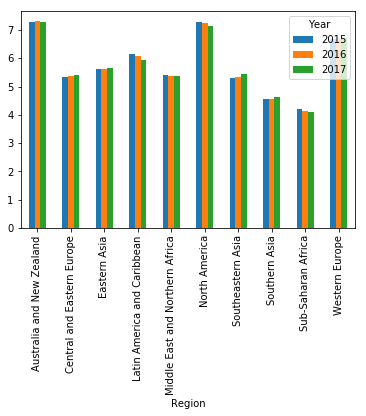

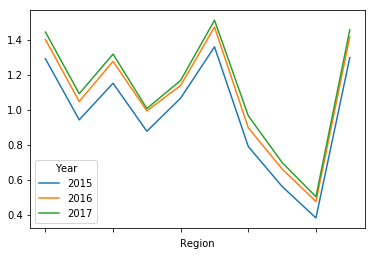

In [28]:
year_region_pivot.plot(kind='bar', y='Happiness Score')
year_region_pivot.plot(y='Economy (GDP per Capita)')

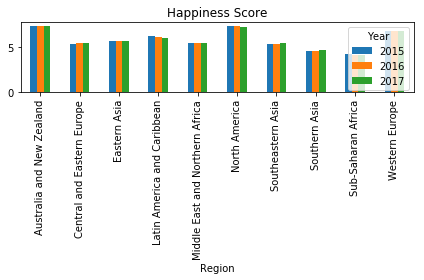

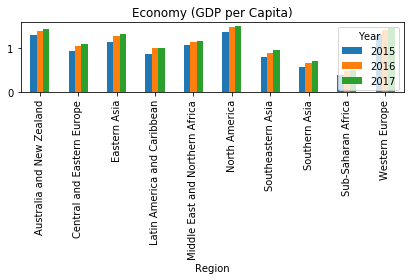

In [30]:
year_region_pivot['Happiness Score'].plot(kind='bar', title='Happiness Score')
plt.tight_layout()
plt.show()

year_region_pivot['Economy (GDP per Capita)'].plot(kind='bar', title='Economy (GDP per Capita)')
plt.tight_layout()
plt.show()

```python

"""
    明确任务：
        按年度、地区分析全球幸福报告
"""
import os
import pandas as pd
import matplotlib.pyplot as plt


# 年度全球幸福报告数据文件
report_datafile_path = './data_pd/happiness_report.csv'

# 结果保存路径
output_path = './output'
if not os.path.exists(output_path):
    os.makedirs(output_path)


def collect_data():
    """
        数据获取
    """
    data_df = pd.read_csv(report_datafile_path)
    return data_df


def process_data(data_df):
    """
        数据处理
    """
    data_df.dropna(inplace=True)
    data_df.sort_values(['Year', 'Happiness Score'], ascending=[True, False], inplace=True)
    return data_df


def analyze_data(data_df):
    """
        数据分析
    """
    year_region_grouped_results = data_df.groupby(by=['Year', 'Region'])['Happiness Score'].mean()
    year_region_pivot_results = pd.pivot_table(data_df, index='Region', columns='Year',
                                               values=['Happiness Score', 'Economy (GDP per Capita)'],
                                               aggfunc='mean')
    return year_region_grouped_results, year_region_pivot_results


def save_plot_results(year_region_grouped_results, year_region_pivot_results):
    """
        结果展示
    """
    year_region_grouped_results.to_csv(os.path.join(output_path, 'year_region_grouped_results.csv'))
    year_region_pivot_results.to_csv(os.path.join(output_path, 'year_region_pivot_results.csv'))

    year_region_pivot_results['Happiness Score'].plot(kind='bar', title='Happiness Score')
    plt.tight_layout()
    plt.show()

    year_region_pivot_results['Economy (GDP per Capita)'].plot(kind='bar', title='Economy (GDP per Capita)')
    plt.tight_layout()
    plt.show()


def main():
    """
        主函数
    """
    # 数据获取
    data_df = collect_data()

    # 数据处理
    proc_data_df = process_data(data_df)

    # 数据分析
    year_region_grouped_results, year_region_pivot_results = analyze_data(proc_data_df)

    # 结果展示
    save_plot_results(year_region_grouped_results, year_region_pivot_results)


if __name__ == '__main__':
    main()
```